In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score, mean_squared_error, r2_score


In [7]:
data=pd.read_csv('D:\pythonML-class\diabetes.csv')
df=pd.DataFrame(data)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
print("Outcome distribution:\n", df['Outcome'].value_counts())


Outcome distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


In [21]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

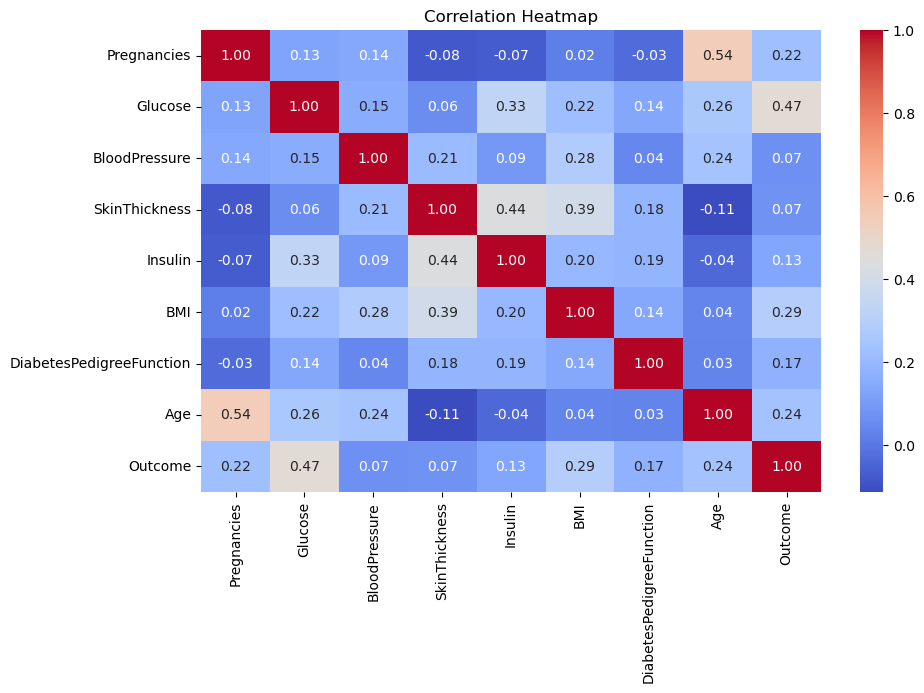

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)
y_pred_log = log_model.predict(X)

In [27]:
print("\nLogistic Regression Evaluation (on full dataset):")
print("Accuracy:", accuracy_score(y, y_pred_log))
print("Precision:", precision_score(y, y_pred_log))
print("Recall:", recall_score(y, y_pred_log))
print("F1 Score:", f1_score(y, y_pred_log))


Logistic Regression Evaluation (on full dataset):
Accuracy: 0.78125
Precision: 0.7358490566037735
Recall: 0.582089552238806
F1 Score: 0.65


In [29]:
print("\nClassification Report:\n", classification_report(
    y, y_pred_log, target_names=["No Diabetes", "Diabetes"]
))



Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.80      0.89      0.84       500
    Diabetes       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768



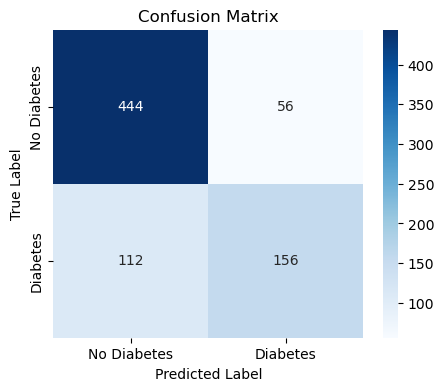

In [30]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["No Diabetes", "Diabetes"],
    yticklabels=["No Diabetes", "Diabetes"]
)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10696\3966114802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette={"0": "green", "1": "red"})


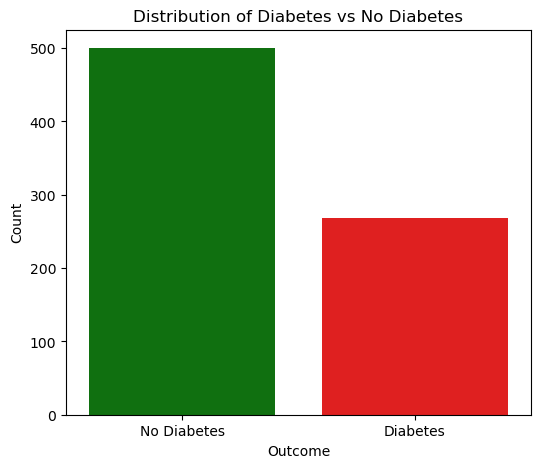

In [43]:
plt.figure(figsize=(6,5))
sns.countplot(x="Outcome", data=df, palette={"0": "green", "1": "red"})
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Diabetes vs No Diabetes")
plt.show()


In [33]:
# Linear Regression (Predict Glucose)
# -----------------------------
X_lin = df.drop("Glucose", axis=1)
y_lin = df["Glucose"]

lin_model = LinearRegression()
lin_model.fit(X_lin, y_lin)
y_pred_lin = lin_model.predict(X_lin)

In [38]:
print("\nLinear Regression Evaluation (on full dataset, predicting Glucose):")
print("MSE:", mean_squared_error(y_lin, y_pred_lin))
print("R^2 Score:", r2_score(y_lin, y_pred_lin))


Linear Regression Evaluation (on full dataset, predicting Glucose):
MSE: 669.4461347115225
R^2 Score: 0.34426994254382104


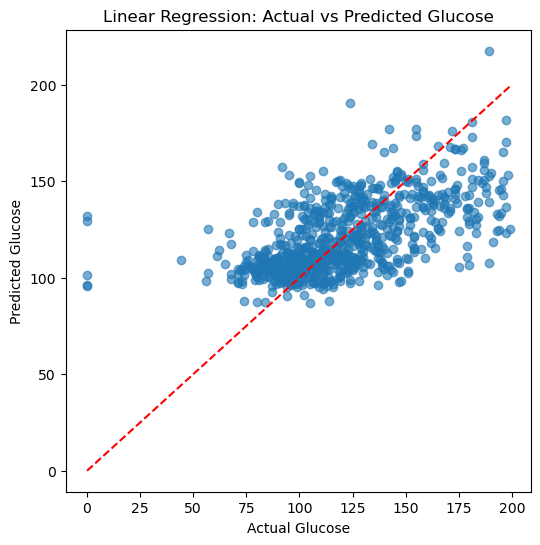

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_lin, y_pred_lin, alpha=0.6)
plt.plot(
    [y_lin.min(), y_lin.max()],
    [y_lin.min(), y_lin.max()],
    'r--'
)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Linear Regression: Actual vs Predicted Glucose")
plt.show()